In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [2]:
#creating a randomized linear dataset
import numpy as np

X= 2 * np.random.rand(100,1)
y = 4+3 * X + np.random.randn(100, 1)

Saving figure generated_data_plot


FileNotFoundError: [Errno 2] No such file or directory: './images/training_linear_models/generated_data_plot.png'

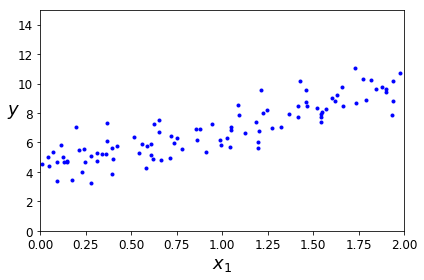

In [3]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation =0, fontsize=18)
plt.axis([0,2,0,15])
save_fig("generated_data_plot")
plt.show()

In [4]:
X_b = np.c_[np.ones((100,1)), X] 
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [5]:
theta_best

array([[ 4.21509616],
       [ 2.77011339]])

In [8]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.21509616],
       [ 9.75532293]])

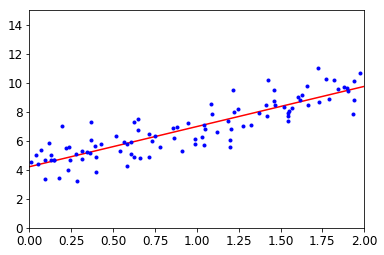

In [9]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [10]:
#equivalent fitting with sklearn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 4.21509616]), array([[ 2.77011339]]))

In [11]:
lin_reg.predict(X_new)

array([[ 4.21509616],
       [ 9.75532293]])

In [12]:
#batch gradient descent
eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) #random init

for iteration in range(n_iterations):
    gradients = 2/m *X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients


In [13]:
theta

array([[ 4.21509616],
       [ 2.77011339]])

In [16]:
#SGD
n_epochs = 50
t0, t1 = 5, 50 #learning schedule parameters

def learning_schedule(t):
    return t0/ (t +t1)

theta = np.random.randn(2,1) # random init

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
    

In [17]:
theta

array([[ 4.18204924],
       [ 2.72749036]])

In [19]:
from sklearn.linear_model import SGDRegressor # equivalent from sklearn

sgd_reg= SGDRegressor(n_iter=50, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

/home/alex/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=50, penalty=None,
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [20]:
sgd_reg.intercept_,sgd_reg.coef_

(array([ 4.20999201]), array([ 2.77931137]))

In [21]:
#polynomial regression
m= 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 +X + 2 + np.random.randn(m, 1)


In [22]:
#X-poly has original features and square of org
from sklearn.preprocessing import PolynomialFeatures 

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]


array([-0.34623717])

In [23]:
X_poly[0]

array([-0.34623717,  0.11988018])

In [25]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([ 1.85453314]), array([[ 0.95849964,  0.49689624]]))

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)              

Saving figure underfitting_learning_curves_plot


FileNotFoundError: [Errno 2] No such file or directory: './images/training_linear_models/underfitting_learning_curves_plot.png'

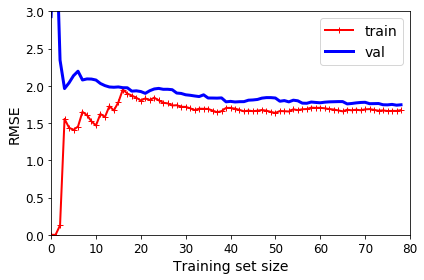

In [33]:
#comparing RMSE of linear and polynomial, this is linear
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         
save_fig("underfitting_learning_curves_plot")   
plt.show()                          

Saving figure learning_curves_plot


FileNotFoundError: [Errno 2] No such file or directory: './images/training_linear_models/learning_curves_plot.png'

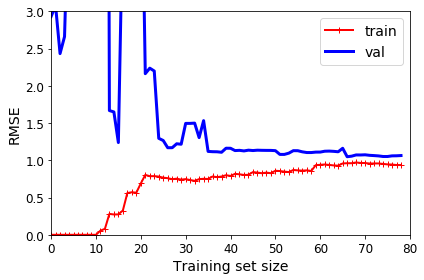

In [35]:
#this is polynomial
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           
save_fig("learning_curves_plot")  
plt.show()                        